To detect outliers in a classification problem with multiple features, various methods can be used, including:

Z-score method: This involves calculating the Z-score for each feature in the data set and identifying those features with Z-scores that are significantly high or low.

Mahalanobis distance: This involves calculating the distance of each data point from the mean of the data set, taking into account the covariance between features.

Isolation Forest: This is an algorithm based on decision trees, where random partitioning is used to isolate outliers in the data set.

One-class SVM: This is a type of support vector machine that is used specifically for outlier detection in classification problems.

# Part 1

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_classification

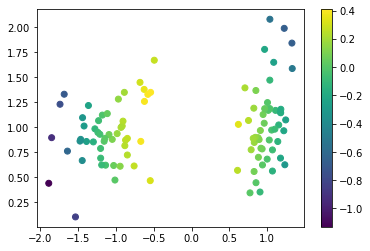

In [28]:
# Generate the data for a binary classification problem
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                         random_state=1, n_clusters_per_class=1)

# Train the OneClassSVM model with a Gaussian RBF kernel
model = OneClassSVM(kernel="rbf", gamma=0.01)
model.fit(X)

# Predict the outlier scores for each data point
scores = model.decision_function(X)

# Plot the data points and color-code the outliers
plt.scatter(X[:, 0], X[:, 1], c=scores)
plt.colorbar()
plt.show()

In [31]:
df=pd.DataFrame(X)
df['Class']=y
df['Scores']=scores
df.head()

,0,1,Class,Scores
0,-1.049486,0.878644,1,0.106352
1,0.878099,0.895511,0,0.132331
2,0.959288,1.039673,0,0.063916
3,-1.180134,1.120622,1,-0.018707
4,-0.907318,1.060409,1,0.235572


In [34]:
df[df['Class']==1].sort_values(by='Scores')

,0,1,Class,Scores
78,-1.888740,0.441190,1,-1.130100e+00
65,-1.850641,0.895623,1,-9.200183e-01
89,-1.535561,0.105936,1,-8.320584e-01
94,-1.739638,1.228674,1,-7.598053e-01
54,-1.684508,1.328579,1,-7.016045e-01
84,-1.641625,0.761707,1,-6.197393e-01
83,-1.446210,0.667592,1,-3.791736e-01
40,-1.475339,0.861463,1,-3.708703e-01
59,-1.466622,0.878741,1,-3.571531e-01
75,-1.441891,1.094885,1,-3.201219e-01


One Class Support Vector Machine (SVM) is a type of unsupervised machine learning algorithm that is used for anomaly detection. It is used to identify outliers in a data set. Unlike a traditional SVM that separates data into multiple classes, one class SVM models the normal behavior of the data, and then detects observations that fall outside this normal behavior. This makes it useful for identifying outliers in datasets where the normal behavior of the data is well understood, and only a small percentage of the observations are expected to be anomalies.







# Part 2

Yes, one way to code outlier detection for classification problems in Python is using one-class Support Vector Machine (SVM). One-class SVM is an unsupervised learning algorithm used for outlier detection. It models the normal data points and then identifies the points that do not belong to this model as outliers.

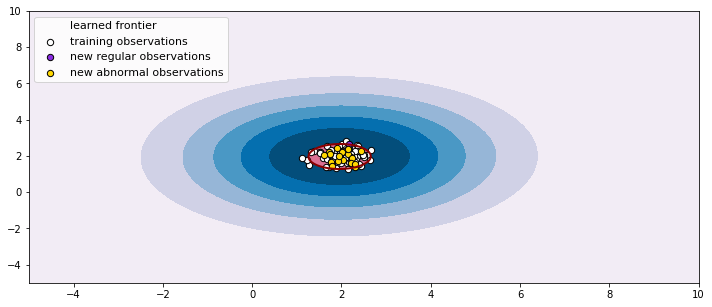

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib

# Generate toy data
X = 0.3 * np.random.randn(100, 2)
X_train = X + 2 * np.ones((100, 2))
X = 0.3 * np.random.randn(20, 2)
X_test = X + 2 * np.ones((20, 2))

# Fit one-class SVM model
clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
clf.fit(X_train)

# Predict outliers
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Plot results
plt.figure(figsize=(12, 5))

# Plot inliers and outliers
xx, yy = np.meshgrid(np.linspace(-5, 10, 500), np.linspace(-5, 10, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[y_pred_test == -1, 0], X_test[y_pred_test == -1, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 10))
plt.ylim((-5, 10))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations", "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

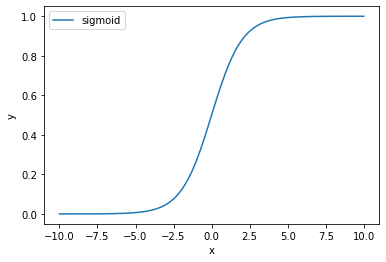

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot the sigmoid function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y, label='sigmoid')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy.stats import ttest_rel

# Load the Iris dataset
dataset = load_iris()
X = dataset['data']
y = dataset['target']

# Create a DataFrame with the features and target
df = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4'])
df['target'] = y

# Loop over all feature pairs and perform paired t-tests
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        feature1 = df[df['target'] == 0][f'feature_{i + 1}']
        feature2 = df[df['target'] == 1][f'feature_{j + 1}']
        
        t, p = ttest_rel(feature1, feature2)
        
        # Print the t-statistic and p-value
        print(f'Feature {i + 1} vs Feature {j + 1}:')
        print(f'T-statistic: {t:.3f}')
        print(f'P-value: {p:.3f}')
        print()

Feature 1 vs Feature 2:
T-statistic: 32.280
P-value: 0.000

Feature 1 vs Feature 3:
T-statistic: 8.664
P-value: 0.000

Feature 1 vs Feature 4:
T-statistic: 66.780
P-value: 0.000

Feature 2 vs Feature 3:
T-statistic: -9.471
P-value: 0.000

Feature 2 vs Feature 4:
T-statistic: 35.214
P-value: 0.000

Feature 3 vs Feature 4:
T-statistic: 3.402
P-value: 0.001



In [13]:
X.shape[1]

4

In [11]:
df[df['target'] == 0]

,feature_1,feature_2,feature_3,feature_4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df[df['target'] == 0][f'feature_{0 + 1}']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: feature_1, dtype: float64